In [8]:
import openmc

In [9]:
from warnings import warn
import openmc.lib

if not openmc.lib._dagmc_enabled():
    warn("DAGMC is not enabled.")

In [10]:
from IPython.display import Image
import openmc
import math
from matplotlib import pyplot as plt

In [11]:
import urllib.request

fuel_pin_url = 'https://tinyurl.com/y3ugwz6w' # 1.2 MB
teapot_url = 'https://tinyurl.com/y4mcmc3u' # 29 MB
paramak_w_graveyard = 'https://tinyurl.com/y7w238th' # 18 MB

def download(url, filename="dagmc.h5m"):
    """
    Helper function for retrieving dagmc models
    """
    u = urllib.request.urlopen(url)
    
    if u.status != 200:
        raise RuntimeError("Failed to download file.")
    
    # save file as dagmc.h5m
    with open(filename, 'wb') as f:
        f.write(u.read())

In [12]:
 # materials
u235 = openmc.Material(name="fuel")
u235.add_nuclide('U235', 1.0, 'ao')
u235.set_density('g/cc', 11)
u235.id = 40

water = openmc.Material(name="water")
water.add_nuclide('H1', 2.0, 'ao')
water.add_nuclide('O16', 1.0, 'ao')
water.set_density('g/cc', 1.0)
water.add_s_alpha_beta('c_H_in_H2O')
water.id = 41

materials = openmc.Materials([u235, water])

In [13]:
download(fuel_pin_url)

In [14]:
dagmc_univ = openmc.DAGMCUniverse(filename="dagmc.h5m")
geometry = openmc.Geometry(root=dagmc_univ)

In [15]:
settings = openmc.Settings()
settings.batches = 100
settings.inactive = 2
settings.particles = 100000

model = openmc.Model(geometry=geometry, materials=materials, settings=settings)
model.export_to_model_xml()

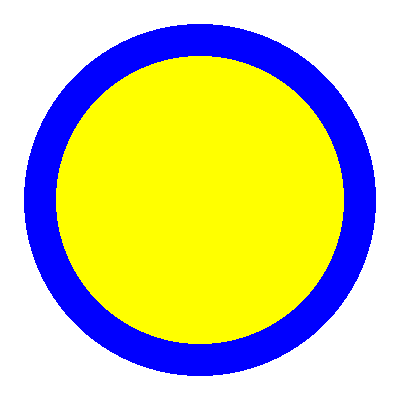

In [16]:
p = openmc.Plot()
p.width = (25.0, 25.0)
p.pixels = (400, 400)
p.color_by = 'material'
p.colors = {u235: 'yellow', water: 'blue'}
openmc.plot_inline(p)

In [17]:
model.settings.source = openmc.Source(space=openmc.stats.Box([-4., -4., -4.],
                                                       [ 4.,  4.,  4.]))
model.export_to_model_xml()

/home/dresden/NuclearBoy/nuclear-boy/lib/python3.10/site-packages/openmc/source.py:388: FutureWarning: This class is deprecated in favor of 'IndependentSource'
  warnings.warn("This class is deprecated in favor of 'IndependentSource'", FutureWarning)


In [18]:
tally = openmc.Tally()
tally.scores = ['total']
tally.filters = [openmc.CellFilter(1)]
tallies = openmc.Tallies([tally])

model.tallies = tallies
model.export_to_model_xml()

In [19]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################